# BIG Hackathon: Data Preprocessing and Network Creation

In [ ]:
# imports
import matplotlib.pyplot as plt
import matplotlib.patches as mplpatches
import matplotlib as mpl
import numpy as np
import pandas as pd

In [ ]:
# mount drive to access shared data
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Given Data

In [ ]:
## Loading in given data with first column set as row headers

# LA data
LA_dataset = pd.read_csv('drive/Shared drives/BIG_2020_Hackathon/Hackathon/Data/LA/LA_cities_covid_data.csv')
LA_dataset.set_index('Location ', inplace=True, drop=True)

# cities
cities_dict = {city.strip('Unincorporated - ').strip():city for city in LA_dataset.index}
rev_cities_dict = {val: key for key, val in cities_dict.items()}
cities = list(cities_dict.keys())

# dictionary of keys as corrected city name : dataframe city name 
LA_dataset = LA_dataset.rename(index=rev_cities_dict)
LA_dataset

,1-Apr,2-Apr,3-Apr,4-Apr,5-Apr,6-Apr,7-Apr,8-Apr,9-Apr,10-Apr,11-Apr,12-Apr,13-Apr,14-Apr,15-Apr,16-Apr,17-Apr,18-Apr,19-Apr,20-Apr,21-Apr,22-Apr,23-Apr,24-Apr,25-Apr,26-Apr,27-Apr,28-Apr,29-Apr,30-Apr,1-May,2-May,3-May,4-May,5-May,6-May,7-May,8-May,9-May,10-May,...,5-Jun,6-Jun,7-Jun,8-Jun,9-Jun,10-Jun,11-Jun,12-Jun,13-Jun,14-Jun,15-Jun,16-Jun,17-Jun,18-Jun,19-Jun,20-Jun,21-Jun,22-Jun,23-Jun,24-Jun,25-Jun,26-Jun,27-Jun,28-Jun,29-Jun,30-Jun,1-Jul,2-Jul,3-Jul,4-Jul,5-Jul,6-Jul,7-Jul,8-Jul,9-Jul,10-Jul,11-Jul,12-Jul,13-Jul,14-Jul
Location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
City of Agoura Hills,10,14,16,17,18,18,19,19,20,20,20,20,20,21,21,22,22,24,24,26,29,29,29,29,29,30,30,30,31,31,31,31,31,31,31,31,31,31,31,31,...,35,35,35,35,36,36,36,37,38,38,38,39,39,43,43,45,47,47,48,49,50,50,51,52,54,58,61,62,62,63,64,65,68,69,69,73,73,74,76,78
City of Alhamb,13,15,17,19,21,22,24,26,27,32,33,33,34,35,37,38,40,42,44,47,51,62,65,68,68,68,75,82,81,83,85,86,87,87,99,102,106,110,113,116,...,231,238,248,249,252,256,266,276,282,286,289,292,309,311,319,328,337,351,363,369,381,392,405,417,440,450,457,474,486,498,510,523,549,559,569,572,590,603,616,640
City of A,12,12,13,13,14,16,17,17,18,19,20,22,22,23,25,26,27,28,28,30,32,34,34,34,34,36,36,37,38,38,39,43,43,44,46,48,50,51,52,53,...,95,97,99,100,102,102,104,105,106,106,107,110,114,124,125,127,130,134,138,141,145,147,154,162,164,168,173,177,181,185,189,194,203,207,211,215,222,230,234,234
City of Artes,12,12,13,13,14,16,17,17,18,19,5,5,5,5,5,7,10,10,10,10,11,12,12,12,13,13,13,13,14,14,14,14,14,14,15,15,15,15,15,15,...,41,43,44,45,48,49,50,55,58,59,62,64,72,72,74,80,82,84,84,86,93,93,95,98,101,104,106,110,114,118,122,126,130,132,135,140,143,153,163,167
City of Aval,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,4,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
White Fence Farms,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,6,7,7,7,7,7,8,11,15,15,16,16,16,16,17,17,17,17,17,17,17,17,17,18,18,18,20,20,20,21,21,22,22,22,23,24,24,24,24,24
Wh,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,4,4,5,5,6,6,6,6,6,6,6,6,6,6,...,15,15,15,15,15,15,15,15,15,15,15,15,15,16,16,17,17,17,17,17,18,18,18,21,21,22,22,22,23,25,27,29,31,33,35,36,37,40,40,43
Whittier Narrows,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## County Distance Data

In [ ]:
lat_long = {}
drop_cities = []

In [ ]:
# Calculating and creation of distance matrix using geopy package
#  converting from county → (lat,long) → all-to-all county distances

from geopy.distance import geodesic
from geopy.geocoders import Nominatim 
geolocator = Nominatim()

print('Iterating cities')
for city in cities:
    if city not in lat_long and city not in drop_cities:
        #print(city, len(drop_cities) + len(lat_long))
        location = geolocator.geocode(city)
        if location == None:
            drop_cities.append(city)
        else:
            print(location)
            lat, log = location.latitude, location.longitude
            if city not in lat_long:
                lat_long[city] = (lat, log)

In [ ]:
# make distance matrix
all_distances = pd.DataFrame(0, index=cities, columns=cities)

print('Making distance matrix')
for i, city_1 in enumerate(cities):
    for j, city_2 in enumerate(cities[:i]):
        if city_1 in lat_long and city_2 in lat_long:
            lat_long1 = lat_long[city_1]
            lat_long2 = lat_long[city_2]
            dist = geodesic(lat_long1, lat_long2).miles
            if dist <= 100:
                all_distances.at[city_1, city_2] = dist
                all_distances.at[city_2, city_1] = dist

# filter too sparse rows and columns (r/c with more then 90% 0)
print('Dropping sparse rows and columns')
all_distances = all_distances.loc[(all_distances==0).mean() < .9, (all_distances==0).mean() < .9]
all_distances

In [ ]:
# converting latitute, longitude dictionary into pandas dataframe and saving as csv
#distances = pd.DataFrame(lat_long.values(), index=lat_long.keys(), columns=['latitude', 'longitude'])
#distances.to_csv('drive/Shared drives/BIG_2020_Hackathon/LA_data/long_lat.csv')

# saving distances as csv
#all_distances.to_csv('drive/Shared drives/BIG_2020_Hackathon/LA_data/distance.csv')

## Reading Data

In [ ]:
# read and drop columns and rows with all 0 values
#   using saved previosly calculated data
all_distances = pd.read_csv('drive/Shared drives/BIG_2020_Hackathon/LA_data/distance.csv')
all_distances.set_index('Unnamed: 0', inplace=True, drop=True)

all_distances

## LA City Population Data

In [ ]:
la_pop = {'Avocado Heights': 15411,
 'Bradbury': 1052,
 'Canyon Country': 1084,
 'Castaic*': 19015,
 'Cerritos': 50462,
 'Charter Oak': 9310,
 'City of Agoura Hills': 20472,
 'City of Baldwin Park': 76252,
 'City of Bell Gardens': 42449,
 'City of Beverly Hills': 33775,
 'City of Bradbury': 1052,
 'City of Burbank': 105861,
 'City of Calabasas': 24193,
 'City of Cerritos': 49994,
 'City of Commerce*': 12868,
 'City of Cudahy': 24172,
 'City of Culver City': 39705,
 'City of Downey': 113529,
 'City of Hawaiian Gardens': 14649,
 'City of Hermosa Beach': 19614,
 'City of Hidden Hills': 1868,
 'City of Huntington Park': 59515,
 'City of La Habra Heights': 5461,
 'City of Lancaster*': 161699,
 'City of Lynwood*': 71269,
 'City of Malibu': 11720,
 'City of Manhattan Beach': 35250,
 'City of Palos Verdes Estates': 13404,
 'City of Rancho Palos Verdes': 41731,
 'City of Redondo Beach': 66994,
 'City of Rolling Hills': 1874,
 'City of Rolling Hills Estates': 8066,
 'City of San Dimas': 33945,
 'City of San Gabriel': 40104,
 'City of Santa Fe Springs': 18925,
 'City of Signal Hill': 11712,
 #'City of South G': 0,
 'Covina (Charter Oak)': 47963,
 'Desert View Highlands': 2360,
 'East Los Angeles': 126496,
 'East Rancho Dominguez': 15135,
 'Hacienda Heights': 54038,
 'Harbor Gateway': 54038,
 'Kagel/Lopez Canyons': 697,
 'La Habra Heights': 62183,
 'Ladera Heights': 6498,
 'Lake Hughes': 649,
 'Lake Los Angeles': 12328,
 'Lennox': 22753,
 'Leona Valley': 1607,
 'Littlerock': 1377,
 'Littlerock/Pearblossom': 2435,
 #'Los Angeles - Als': 0,
 'Los Angeles - Angelino Heights': 18166,
 'Los Angeles - Baldwin Hills': 30478,
 'Los Angeles - Boyle Heights*': 84554,
 'Los Angeles - Canoga Park': 60000,
 'Los Angeles - Carthay': 4713,
 'Los Angeles - Central': 836638,
 'Los Angeles - Century City': 6326,
 'Los Angeles - Chatsworth': 41255,
 'Los Angeles - Cheviot Hills': 25429,
 'Los Angeles - Country Club Park': 6830,
 'Los Angeles - Crestview': 2843,
 'Los Angeles - Del Rey': 28586,
 'Los Angeles - Downtown*': 12199,
 'Los Angeles - Eagle Rock': 34644,
 'Los Angeles - Echo Park': 36118,
 'Los Angeles - Elysian Park': 2600,
 'Los Angeles - Elysian Valley': 8800,
 'Los Angeles - Exposition Park': 34499,
 'Los Angeles - Glassell Park': 24816,
 #'Los Angeles - Gramercy Pl': 0,
 'Los Angeles - Granada Hills': 53266,
 'Los Angeles - Green Meadows': 30000,
 'Los Angeles - Hancock Park': 29597,
 'Los Angeles - Harbor City': 36000,
 'Los Angeles - Harbor Gateway': 40169,
 'Los Angeles - Harbor Pines': 23561,
 'Los Angeles - Harvard Heights': 20706,
 'Los Angeles - Harvard Park': 7517,
 'Los Angeles - Highland Park': 23411,
 'Los Angeles - Hollywood Hills': 20982,
 'Los Angeles - Hyde Park': 34645,
 'Los Angeles - Jefferson Park': 53256,
 'Los Angeles - Lakeview T': 14460,
 'Los Angeles - Leimert Park': 11374,
 'Los Angeles - Lincoln Heights': 25651,
 'Los Angeles - Los Feliz': 44686,
 'Los Angeles - Mid-city': 146100,
 'Los Angeles - Mission Hills': 15056,
 'Los Angeles - North Hills': 66590,
 'Los Angeles - Pacific Palisades': 28000,
 'Los Angeles - Palms': 42545,
 'Los Angeles - Panorama City': 70686,
 'Los Angeles - Playa Del Rey': 16230,
 'Los Angeles - Porter Ranch': 30571,
 'Los Angeles - Rancho Park': 25429,
# 'Los Angeles - Res': 0,
 'Los Angeles - Reseda Ranch': 80524,
 'Los Angeles - San Pedro*': 73264,
 'Los Angeles - Shadow Hills': 31025,
 'Los Angeles - Sherman Oaks': 70176,
 'Los Angeles - South Carthay': 5120,
 'Los Angeles - South Park': 34856,
 'Los Angeles - Studio City': 38237,
 'Los Angeles - Sun Valley': 55742,
 'Los Angeles - Sylmar*': 96487,
 'Los Angeles - Temple-Beaudry': 11120,
 'Los Angeles - University Hills': 5093,
 'Los Angeles - University Park': 23493,
 'Los Angeles - Van Nuys': 93258,
 'Los Angeles - Vermont Knolls': 21856,
 'Los Angeles - Vernon Central': 112,
 'Los Angeles - Victoria Park': 2444,
 'Los Angeles - Watts': 34830,
 'Los Angeles - West Adams': 11961,
 'Los Angeles - West Hills': 41426,
 'Los Angeles - West Los Angeles': 42797,
 'Los Angeles - Wilshire C': 65232,
 'Los Angeles - Woodland Hills': 69044,
 'Marina del Rey': 8866,
 'Northeast San Gabriel': 14874,
 'Quartz Hill': 10912,
 'Rancho Dominguez': 15135,
 'Rowland Heights': 48993,
 'San Pasqual': 2041,
 'Santa Monica Mountains': 8929,
 'South San Gabriel': 8070,
 'Stevenson Ranch': 17557,
 'View Park/Windsor Hills': 11075,
 'Walnut Park': 15966,
 'West Chatsworth': 41309,
 'West Puente Valley': 22636,
 'West Rancho Dominguez': 5669,
 'Whittier Narrows': 22624,
 'Willowbrook': 35983}


# Network Creation

## Reading distance data

In [ ]:
# read and drop columns and rows with all 0 values
#   using saved previosly calculated data
distances = pd.read_csv('drive/Shared drives/BIG_2020_Hackathon/LA_data/distance.csv')
distances.set_index('Unnamed: 0', inplace=True, drop=True)

In [ ]:
# finding invalid cities (no distance data cities)
all_cities = set(LA_dataset.index)
valid_cities = set(distances.index)
invalid_cities = all_cities.difference(valid_cities).union(valid_cities.difference(set(la_pop.keys())))

# dropping invalid cities
LA_dataset.drop(invalid_cities, inplace=True, axis=0)
distances.drop(invalid_cities, inplace=True, axis=0)
distances.drop(invalid_cities, inplace=True, axis=1)

LA_dataset

,1-Apr,2-Apr,3-Apr,4-Apr,5-Apr,6-Apr,7-Apr,8-Apr,9-Apr,10-Apr,11-Apr,12-Apr,13-Apr,14-Apr,15-Apr,16-Apr,17-Apr,18-Apr,19-Apr,20-Apr,21-Apr,22-Apr,23-Apr,24-Apr,25-Apr,26-Apr,27-Apr,28-Apr,29-Apr,30-Apr,1-May,2-May,3-May,4-May,5-May,6-May,7-May,8-May,9-May,10-May,...,5-Jun,6-Jun,7-Jun,8-Jun,9-Jun,10-Jun,11-Jun,12-Jun,13-Jun,14-Jun,15-Jun,16-Jun,17-Jun,18-Jun,19-Jun,20-Jun,21-Jun,22-Jun,23-Jun,24-Jun,25-Jun,26-Jun,27-Jun,28-Jun,29-Jun,30-Jun,1-Jul,2-Jul,3-Jul,4-Jul,5-Jul,6-Jul,7-Jul,8-Jul,9-Jul,10-Jul,11-Jul,12-Jul,13-Jul,14-Jul
Location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
City of Agoura Hills,10,14,16,17,18,18,19,19,20,20,20,20,20,21,21,22,22,24,24,26,29,29,29,29,29,30,30,30,31,31,31,31,31,31,31,31,31,31,31,31,...,35,35,35,35,36,36,36,37,38,38,38,39,39,43,43,45,47,47,48,49,50,50,51,52,54,58,61,62,62,63,64,65,68,69,69,73,73,74,76,78
City of Baldwin Park,3,5,7,9,10,11,11,12,15,18,22,25,28,31,34,35,37,40,41,44,52,57,62,67,70,72,73,77,83,85,89,94,100,107,116,124,126,128,144,149,...,393,405,407,412,419,427,445,464,484,494,513,535,552,561,576,594,620,656,710,726,744,760,785,824,865,903,929,952,987,1023,1059,1095,1137,1168,1189,1215,1254,1301,1339,1392
City of Bell Gardens,5,5,8,10,12,11,12,17,21,23,26,28,33,35,39,41,46,52,54,58,63,70,75,80,82,82,84,90,97,103,106,109,109,110,117,121,125,129,133,133,...,358,359,368,374,393,398,416,429,435,448,453,469,493,500,507,532,556,577,590,592,604,618,636,662,678,703,715,722,735,748,761,774,821,859,870,901,927,945,966,992
City of Beverly Hills,39,45,53,60,65,65,70,71,71,71,73,74,74,76,78,78,78,80,80,94,99,100,102,103,103,104,105,105,106,106,108,110,112,113,114,116,115,116,118,119,...,144,146,147,149,150,152,155,158,165,169,174,176,188,190,191,197,199,201,203,203,206,207,218,229,235,237,243,246,261,276,291,306,311,329,331,351,372,389,402,419
City of Bradbury,0,0,0,0,0,0,0,0,0,0,0,0,0,76,78,78,78,80,80,94,99,100,102,103,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,...,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Chatsworth,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
West Puente Valley,0,0,11,17,0,0,0,0,0,6,6,6,6,6,6,6,6,6,6,6,7,7,8,9,39,13,13,15,15,16,17,18,18,19,19,19,20,24,26,27,...,48,48,50,51,53,53,54,59,60,61,63,63,63,63,64,67,68,84,94,98,103,108,115,120,123,128,133,141,147,154,161,168,174,176,179,183,192,199,203,214
West Rancho Dominguez,0,0,0,17,0,0,0,0,0,6,6,6,6,6,6,6,6,6,6,6,7,7,8,9,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,11,11,11,12,12,12,12,12,13,14,14,14,14,14,15,15,15


## Create network

In [ ]:
import networkx as nx

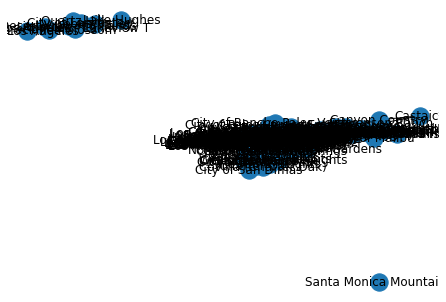

In [ ]:
# all to all dictionary if close enough by thershold
cities = distances.index
threshold = 10

# creating network
G=nx.Graph()
G.add_nodes_from(cities)

for i, city_1 in enumerate(cities):
    for j, city_2 in enumerate(cities):
        if city_1 != city_2:
            dist = distances.at[city_1, city_2]
            if dist <= threshold:
                edge = (city_1, city_2)
                G.add_edge(*edge)

nx.draw(G, with_labels = True)
#nx.draw(G)
plt.show()

## Calculating Severe Factor


severe_factor = sum( connected nodes' cases / connected nodes' population )  

* a node is connected if close distance is less than threshold


In [ ]:
def case_ratio(city):
    ''' Returns pandas series of cases/population across time points'''
    city_population = la_pop[city]
    city_cases = LA_dataset.loc[city]
    ratio = city_cases / city_population
    return ratio

In [ ]:
dates = list(LA_dataset.columns.values)
scaling_factor = 100
dist_threshold = 5

In [ ]:
# make pandas dataframe for severity factors
severity_df = pd.DataFrame(0, index=cities, columns=dates)

for city in cities:
    for city, adj_city in list(G.edges(city)):
        dist = distances.at[city, adj_city] + 1

        # add current city ratio
        #city_case_ratio_dist_corrected = case_ratio(adj_city) / dist_threshold
        #severity_df.loc[city] += city_case_ratio_dist_corrected

        if dist <= dist_threshold:
            adj_case_ratio_dist_corrected = case_ratio(adj_city) / dist

            # add adj_case_ratio_dist_corrected to severity_df
            severity_df.loc[city] += adj_case_ratio_dist_corrected
            
severity_df = severity_df*scaling_factor
severity_df

# save county severity data as csv
#severity_df.to_csv('drive/Shared drives/BIG_2020_Hackathon/LA_data/LA_city_severity.csv')

,1-Apr,2-Apr,3-Apr,4-Apr,5-Apr,6-Apr,7-Apr,8-Apr,9-Apr,10-Apr,11-Apr,12-Apr,13-Apr,14-Apr,15-Apr,16-Apr,17-Apr,18-Apr,19-Apr,20-Apr,21-Apr,22-Apr,23-Apr,24-Apr,25-Apr,26-Apr,27-Apr,28-Apr,29-Apr,30-Apr,1-May,2-May,3-May,4-May,5-May,6-May,7-May,8-May,9-May,10-May,...,5-Jun,6-Jun,7-Jun,8-Jun,9-Jun,10-Jun,11-Jun,12-Jun,13-Jun,14-Jun,15-Jun,16-Jun,17-Jun,18-Jun,19-Jun,20-Jun,21-Jun,22-Jun,23-Jun,24-Jun,25-Jun,26-Jun,27-Jun,28-Jun,29-Jun,30-Jun,1-Jul,2-Jul,3-Jul,4-Jul,5-Jul,6-Jul,7-Jul,8-Jul,9-Jul,10-Jul,11-Jul,12-Jul,13-Jul,14-Jul
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
City of Agoura Hills,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
City of Baldwin Park,0.000000,0.000000,0.016198,0.025034,0.000000,0.000000,0.000000,0.000000,0.000000,0.016947,0.018569,0.018569,0.018569,1.463436,1.503081,1.503081,1.499836,1.537859,1.537859,1.804019,1.902171,1.922804,1.963922,1.986028,0.095909,0.059244,0.059244,0.062189,0.062189,0.063662,0.065134,0.066607,0.066607,0.068079,0.068079,0.068079,0.071174,0.077064,0.099021,0.100494,...,0.200263,0.205129,0.208074,0.211169,0.218981,0.220603,0.220454,0.229439,0.232534,0.234006,0.241818,0.241818,0.245062,0.246685,0.249779,0.273209,0.279548,0.333476,0.354691,0.398604,0.405967,0.416574,0.428504,0.442356,0.450018,0.460626,0.491867,0.511758,0.522216,0.534146,0.546077,0.578641,0.595587,0.601777,0.606194,0.613707,0.633449,0.647002,0.659381,0.688557
City of Bell Gardens,0.102259,0.125442,0.145646,0.172089,0.197556,0.210313,0.231941,0.251262,0.291665,0.171871,0.180894,0.190282,0.193190,0.209198,0.216380,0.204936,0.216737,0.227061,0.234742,0.272275,0.320025,0.355530,0.388429,0.402096,0.308513,0.429169,0.439367,0.454171,0.477033,0.501734,0.533261,0.551712,0.562798,0.566397,0.590185,0.622975,0.634613,0.663530,0.683485,0.695363,...,2.022959,2.069733,2.123294,2.146390,2.201566,2.271918,2.374395,2.483891,2.551702,2.587329,2.618645,2.696892,2.774303,2.818118,2.849103,2.945259,3.043653,3.158567,3.250086,3.291061,3.351887,3.412759,3.483305,3.584544,3.685822,3.824327,3.885309,3.977463,4.064054,4.157812,4.247727,4.342185,4.512458,4.614653,4.679900,4.786831,4.905259,5.024585,5.140165,5.301190
City of Beverly Hills,0.593580,0.667785,0.794346,0.850332,0.950312,1.002823,1.016390,1.050931,1.063269,1.119457,1.176081,1.192731,1.205928,1.232267,1.278943,1.326391,1.384374,1.464638,1.510862,1.629195,1.745092,1.823119,1.854109,1.899954,1.934806,1.996089,2.048435,2.094101,2.125784,2.160693,2.216525,2.288447,2.315647,2.321659,2.386024,2.391366,2.397233,2.406363,2.446532,2.484706,...,3.509881,3.576277,3.638489,3.656483,3.708926,3.736615,3.781722,3.831210,3.857291,3.873736,3.902503,3.901807,4.053517,4.099482,4.147645,4.231965,4.286225,4.397068,4.465149,4.516919,4.595966,4.673895,4.770864,4.834212,4.993014,5.078385,5.207627,5.273852,5.329253,5.398676,5.455401,5.534626,5.710518,5.811835,5.853216,5.966608,6.077049,6.179040,6.261520,6.376258
City of Bradbury,0.000787,0.001311,0.001836,0.002361,0.002623,0.002885,0.002885,0.003147,0.003934,0.004721,0.005770,0.006557,0.007344,0.008131,0.008918,0.009180,0.009705,0.010492,0.010754,0.011541,0.013639,0.014950,0.016262,0.017573,0.018360,0.018885,0.019147,0.020196,0.021770,0.022294,0.023344,0.024655,0.026229,0.028065,0.030425,0.032524,0.033048,0.033573,0.037770,0.039081,...,0.103079,0.10

In [ ]:
# saving final data

# valid cities
#LA_dataset.to_csv('drive/Shared drives/BIG_2020_Hackathon/LA_data/final/LA_cities_cases.csv')

# severity data
#severity_df.to_csv('drive/Shared drives/BIG_2020_Hackathon/LA_data/final/LA_cities_severity.csv')